# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [80]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import imageio
from skimage.color import rgb2gray

from skimage import io
import os

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

img_src = './data/'

def myResourcePath(fname):
    filename = os.path.join(img_src, fname)
    if not os.path.exists(filename):
        raise RuntimeError(f'file not found {filename}')
    return filename

In [2]:
def img_info(image):
    print(image.shape, image.dtype, type(image)) 

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [81]:
zebra = io.imread(myResourcePath('zebra.jpg'))
zebra_gray =  rgb2gray(zebra)

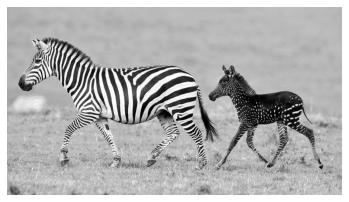

In [82]:
myimshow(zebra_gray)

In [83]:
img_info(zebra_gray)

(1020, 1814) float64 <class 'numpy.ndarray'>


In [84]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

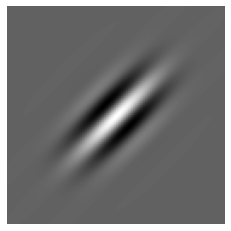

In [96]:
g = genGabor((128,128), 0.3, np.pi/4)
myimshow(g)

In [88]:
theta = np.arange(0, np.pi, np.pi/4)
omega = np.arange(0.2, 0.6, 0.1)
params = [(th,om) for om in omega for th in theta]

gaborParams = []

for (theta, omega) in params:
    gaborParam = {'omega':omega, 'theta':theta, 'sz':(128, 128)}
    g = genGabor(func=np.cos, **gaborParam)
    gaborParams.append(g)

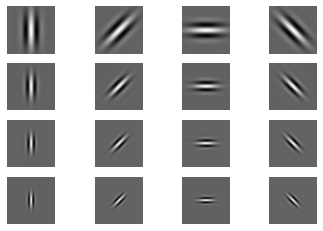

In [89]:
plt.figure()
n = len(gaborParams)
for i in range(n):
    plt.subplot(4,4,i+1)
    plt.axis('off'); 
    plt.imshow(gaborParams[i])


2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

<Figure size 432x288 with 0 Axes>

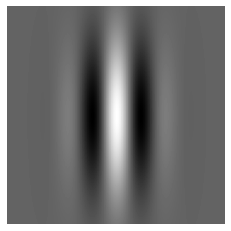

<Figure size 432x288 with 0 Axes>

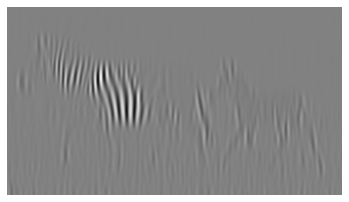

In [90]:
from scipy.ndimage import convolve

g = gaborParams[0] 
plt.figure();
myimshow(g)
res = convolve(zebra_gray, g)
plt.figure();
myimshow(res); 

<Figure size 432x288 with 0 Axes>

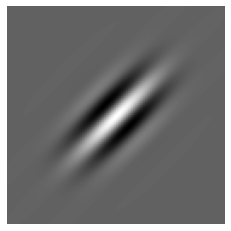

<Figure size 432x288 with 0 Axes>

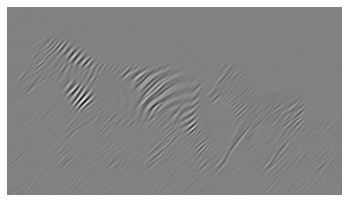

In [91]:
g = gaborParams[5] 
plt.figure();
myimshow(g)
res = convolve(zebra_gray, g)
plt.figure();
myimshow(res); 

Applicando un determinato filtro in una direzione specifica, vengono evidenziate le porzioni nell'immagine in quella direzione determinata dal filtro di Gabor

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

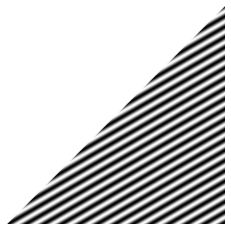

In [97]:
img = io.imread(myResourcePath('gabor1.jpg'))
myimshow(img)

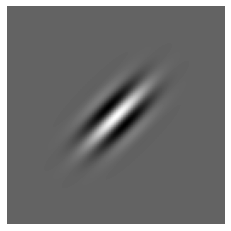

In [99]:
Gabor = genGabor((128,128), 0.4, np.pi/4)
myimshow(Gabor)

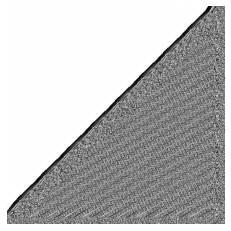

In [100]:
res = convolve(img, Gabor)
myimshow(res); 

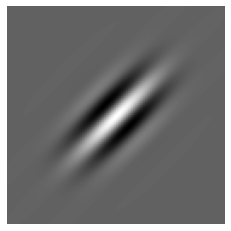

In [102]:
g = genGabor((128,128), 0.3, np.pi/4)
myimshow(g)

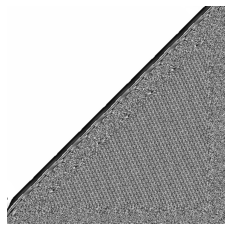

In [103]:
res = convolve(img, g)
myimshow(res); 

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

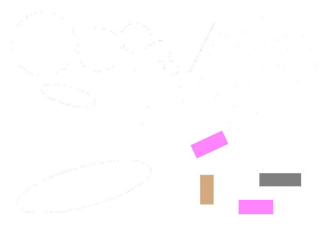

In [10]:
rettangoli  = io.imread(myResourcePath('rettangoli.jpg'))
myimshow(rettangoli)

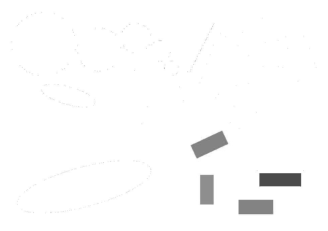

In [11]:
rettangoli_gray = rgb2gray(rettangoli)
myimshow(rettangoli_gray)

In [12]:
img_info(rettangoli_gray)

(648, 936) float64 <class 'numpy.ndarray'>


In [17]:
def change_brightness(img,gamma):  #lavora su immagini float
    return np.clip(img + gamma, 0,1)

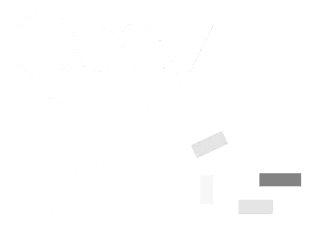

In [23]:
result = change_brightness(rettangoli_gray,0.3)
myimshow(result)

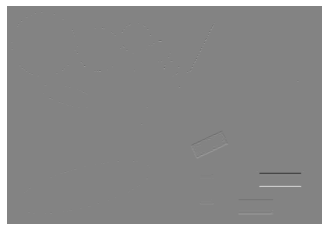

In [20]:
from skimage import filters

h_result = filters.sobel_h(result)
myimshow(h_result)

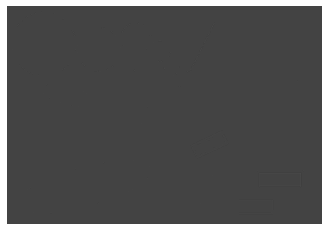

In [24]:
from scipy.ndimage import filters
r = filters.laplace(result)
myimshow(r)

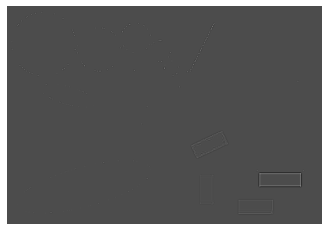

In [26]:
r = filters.gaussian_laplace(result,1)
myimshow(r)

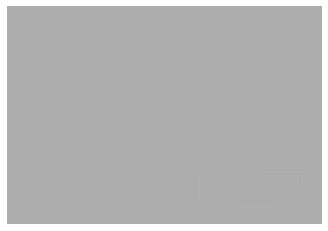

In [63]:
filter2 = io.imread(myResourcePath('filter2.jpg'))
myimshow(filter2)

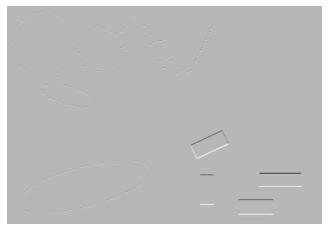

In [80]:
result = change_brightness(h_result,0.8)
myimshow(result)

Dopo le varie prove, il filtro applicato sembrerebbe quello di sobel verticale perchè vengono evidenziate le linee orizzontali

filter2 risultato
imm partenza rettangoli

# Esercizio 3

Mostrare gli effetti e spiegare cosa succedequando si applica due volte un filtro gaussiano

Data un'immagine _img_ applicare il filtro gaussiano G

img1 = G(G(img))

A cosa equivale questa trasformazione?
Fornire un esempio

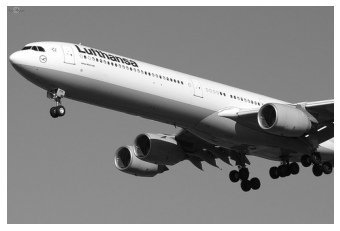

In [34]:
airplane = io.imread(myResourcePath('airplane.jpg'))
airplane_gray = rgb2gray(airplane)
myimshow(airplane_gray)

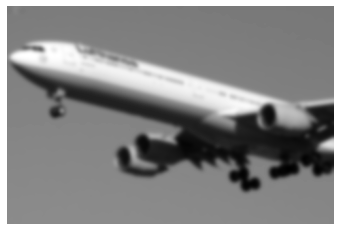

In [41]:
from scipy import ndimage
blurred_image = ndimage.gaussian_filter(airplane_gray, sigma=3)
myimshow(blurred_image)

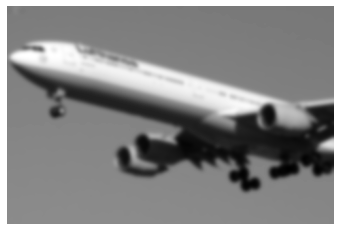

In [42]:
blurred_image2 = ndimage.gaussian_filter(blurred_image, sigma=1)
myimshow(blurred_image)

In qualche modo smussiamo gli effeti del filtro gaussiano.

Cos'altro possiamo fare?


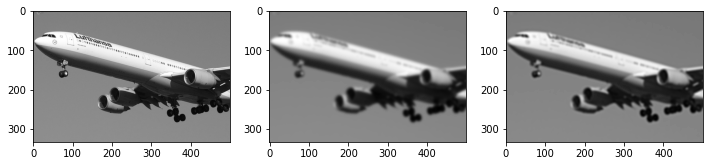

In [44]:
alpha = 10

sharpened = blurred_image + alpha * (blurred_image - blurred_image2)


plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(airplane_gray, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(sharpened, cmap='gray')

Applicando due volte un filtro gaussiano, possiamo effettuare lo sharpening dell'immagine. In che modo?
Otteniamo un filtro gaussiano all'imm già modificata: calcoliamo il valore medio pesato sul singolo pixel dell'imm già filtrata e andiamo a vedere quanto, all'interno dell'imm filtrata, i pixel cambiano (e usiamo il secondo filtro gaussiano).
La diff tra blurred e filter mi dice la distanza tra l'imm iniziale e l'imm post filtro (quanto ha influito il filtro nella trasformazione) che viene opportunamete pesata tramite un parametro alpha

Questa differenza ipotizzo che sia un fattore di correzione che mi ha portato a modificare l'imm e amplifico tale differenza in modo tale da poter tornare all'imm originale
andiamo cioè a vedere quanto il filtro gaussiano ha modificato l'imm

# Esercizio 4

Identificare i cerchi verdi tramite trasformata di Hough contornandoli con un quadrato

![](forme.jpg)

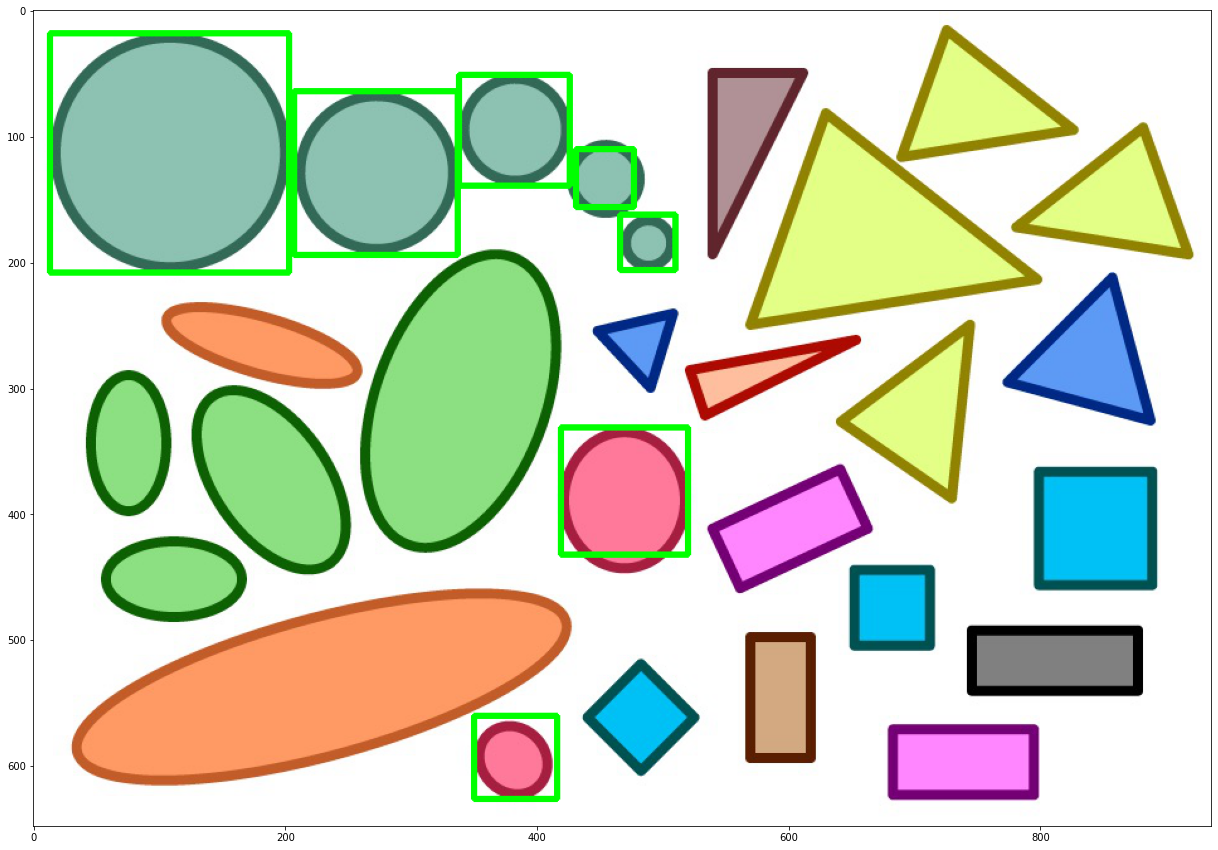

In [145]:
def get_square(circles):
    squares = []
    for circle in circles:
        x = circle[0]
        y = circle[1]
        r = circle[2]
        
        a = (x-r,y-r)
        b = (x+r,y-r)
        c = (x+r,y+r)
        d = (x-r,y+r)
        squares.append([a,b,c,d])
    return squares

forme_rgb = io.imread(myResourcePath('forme.jpg'))
forme =  rgb2gray(forme_rgb) #convertiamo in scala di grigi

img = skimage.img_as_ubyte(forme) #il dtype deve essere uint8
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, minDist=50, param1=50, param2=45, minRadius=22, maxRadius=110)        
circles = np.squeeze(circles)

squares = get_square(circles)

img_forme = np.copy(forme_rgb)
for square in squares:
    cv2.rectangle(img_forme, square[0], square[2], (0,255,0), 3)

plt.rcParams["figure.figsize"] = (25,15)    
plt.imshow(img_forme);

# Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 45° in senso orario in (5, 5) e una traslazione di 50 px sull'asse x.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

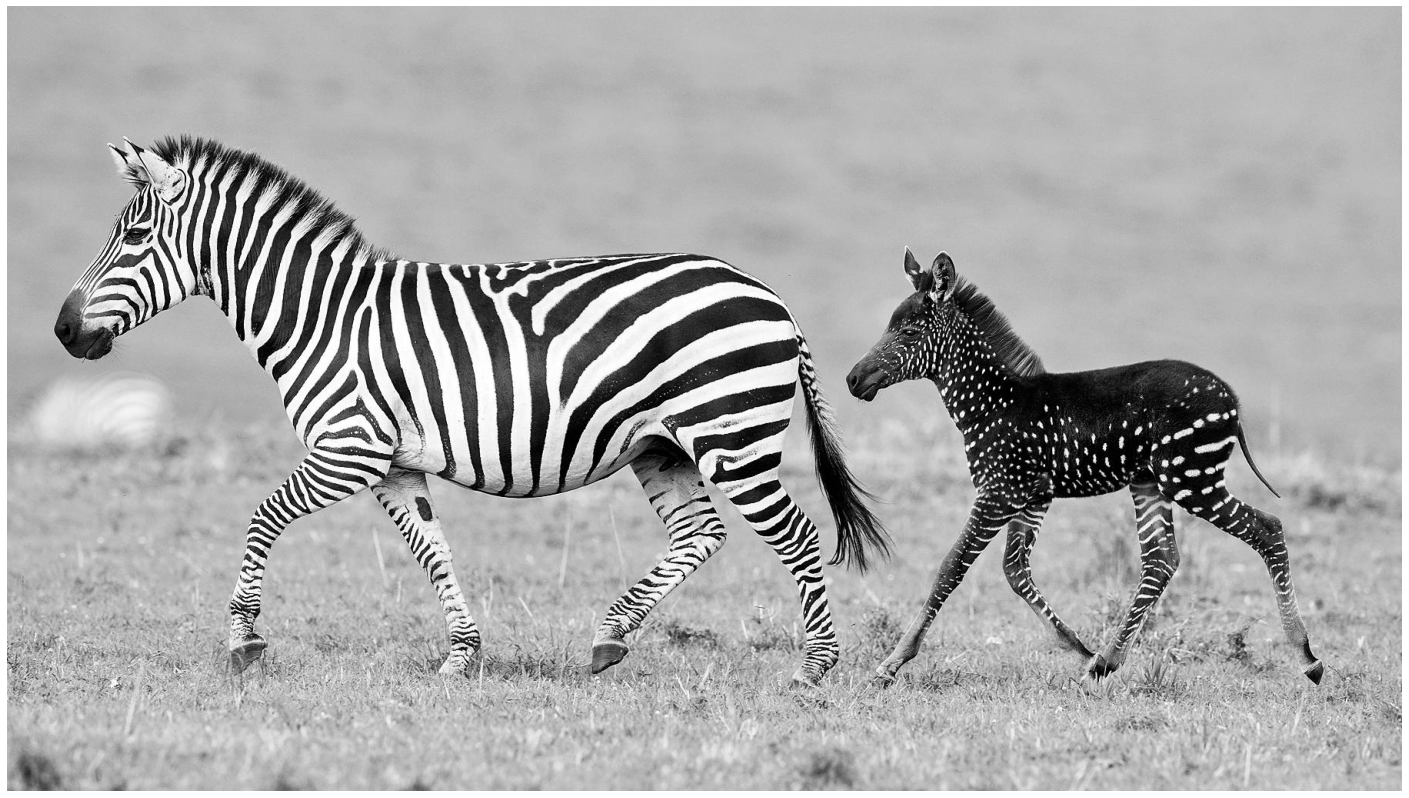

In [118]:
from skimage import color
myimshow(zebra_gray)

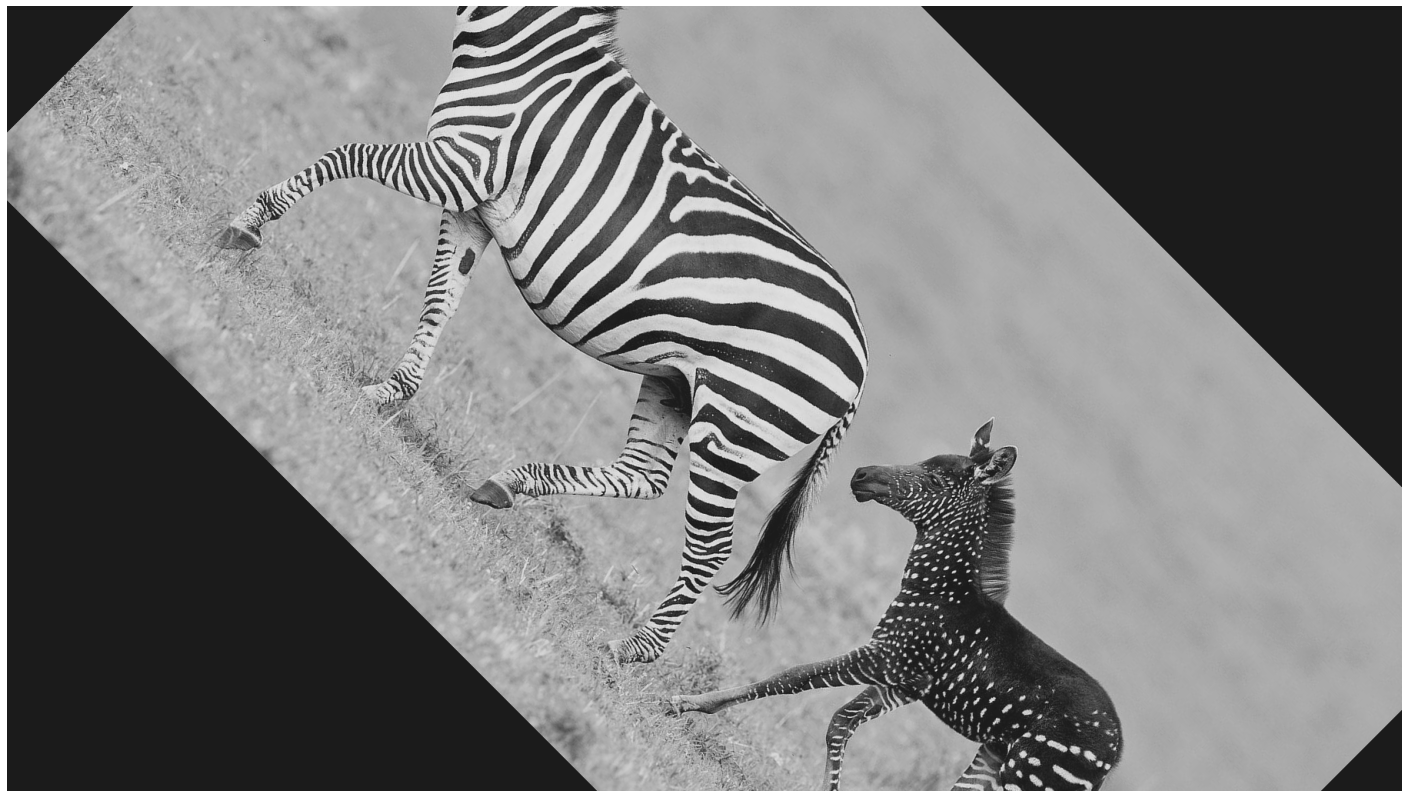

In [136]:
alpha = np.pi/4
transform=np.array([[np.cos(alpha),-np.sin(alpha)],[np.sin(alpha),np.cos(alpha)]])
center = 0.5*np.array(zebra_gray.shape) + 50
offset = (center-center.dot(transform)).dot(linalg.inv(transform))
dst = affine_transform(zebra_gray,transform,order=2,offset=-offset)
myimshow(dst)